<a href="https://colab.research.google.com/github/sapthagiri70/Blimp-Project/blob/main/Delivarable%204%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

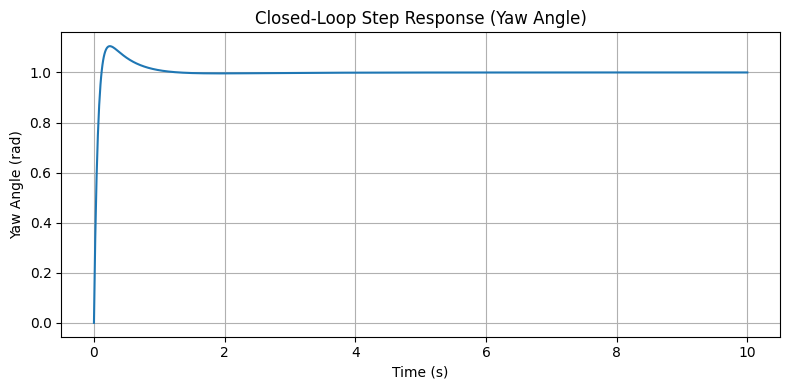

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
Iz = 0.05  # Moment of inertia (kg·m²)
Kp = 3     # Proportional gain
Ki = 2     # Integral gain
Kd = 1     # Derivative gain

# PID Controller: (Kd*s^2 + Kp*s + Ki) / s
numC = [Kd, Kp, Ki]
denC = [1, 0]  # For 1/s

# Plant: 1 / (Iz * s^2)
numG = [1]
denG = [Iz, 0, 0]

# Open-loop transfer function: C(s) * G(s)
num_OL = np.polymul(numC, numG)
den_OL = np.polymul(denC, denG)

# Closed-loop: OL / (1 + OL)
num_CL = num_OL
den_CL = np.polyadd(den_OL, num_OL)

# Define system
system = signal.TransferFunction(num_CL, den_CL)

# Time axis
t = np.linspace(0, 10, 1000)

# Step response
t_out, response = signal.step(system, T=t)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t_out, response)
plt.title("Closed-Loop Step Response (Yaw Angle)")
plt.xlabel("Time (s)")
plt.ylabel("Yaw Angle (rad)")
plt.grid(True)
plt.tight_layout()
plt.show()
